In [3]:
#installing libraries
!pip install gspread 
!pip install pandas

In [4]:
import pandas as pd

In [5]:
!pip install oauth2client

In [6]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials


In [7]:
from datetime import datetime, timedelta
import random

In [8]:
#Defining the scope
scope = ["https://spreadsheets.google.com/feeds",
         "https://www.googleapis.com/auth/drive"]


In [9]:
#Using the JSON Key file from Google cloud console to authenticate/load credientials to ensure complete access to my sheet
crediential = ServiceAccountCredentials.from_json_keyfile_name("C:/Users/Chika/Downloads/acquired-grid-444809-v6-e94058881be0.json", 
    scope
)


In [10]:
#Authorizing the gspread client
client = gspread.authorize(crediential)


In [11]:
#Opening the google sheet by its name
sheet = client.open("Transport_orders").sheet1

In [12]:
#Fetch and printing all data from my Google Sheet - Transport Order
data = sheet.get_all_records()
print(type(data))  # Should output <class 'list'>
print(type(data[0]))  # Should output <class 'dict'>


<class 'list'>
<class 'dict'>


In [15]:
print(type(data))
print(type(data[1]))  # Check the type of the first element in the list
print(data[1])  # Print the first element to inspect its structure


<class 'list'>
<class 'dict'>
{'Order ID': 2, 'Pickup_Locations': 'Paris', 'Drop_off Locations': 'Los Angeles', 'Order Status': 'Delivered', 'Timestamp': '29/12/2024 21:43:25', 'Shipped date': '31/12/2024 21:43:25', 'Delivery Date': '09/01/2025 21:43:25', 'Delivery Duration': '9 days ', 'Transport Type': 'Train', 'Weight (kg)': 92, 'Volume ': 9, 'Pickup_Latitude': 56.36, 'Pickup_longitude': 28.28, 'Dropoff_Latitude': 40.83, 'Dropoff _Longitude': 9.04, 'Distance (KM)': 2217, 'Cost': 665.04}


In [17]:
TP = pd.DataFrame(data)

In [18]:
TP.head(5)

,Order ID,Pickup_Locations,Drop_off Locations,Order Status,Timestamp,Shipped date,Delivery Date,Delivery Duration,Transport Type,Weight (kg),Volume,Pickup_Latitude,Pickup_longitude,Dropoff_Latitude,Dropoff _Longitude,Distance (KM),Cost
0,1,Berlin,Rome,Pending,28/12/2024 21:43:23,Awaiting shipment,Pending Delivery,Pending,Ship,34,32,40.85,27.51,39.83,14.32,1122,224.50
1,2,Paris,Los Angeles,Delivered,29/12/2024 21:43:25,31/12/2024 21:43:25,09/01/2025 21:43:25,9 days,Train,92,9,56.36,28.28,40.83,9.04,2217,665.04
2,3,Tokyo,Rome,In Transit,26/12/2024 21:43:27,Awaiting shipment,Pending Delivery,Pending,Ship,120,9,37.72,17.04,40.85,20.53,459,91.84
3,4,New York,Singapore,Delivered,30/12/2024 21:43:28,01/01/2025 21:43:28,10/01/2025 21:43:28,9 days,Train,92,11,54.05,27.38,35.01,0.76,2956,886.71
4,5,London,Rome,Delivered,28/12/2024 21:43:30,31/12/2024 21:43:30,12/01/2025 21:43:30,12 days,Train,91,13,36.16,0.04,47.36,17.55,1905,571.64


In [19]:
# Convert date columns to consistent YYYY-MM-DD format
date_columns = ['Timestamp', 'Shipped date', 'Delivery Date']

In [20]:
for col in date_columns:
    # Convert all date columns, with 'dayfirst' handling European CSV formats
    TP[col] = pd.to_datetime(TP[col], dayfirst=False, errors='coerce')  # Set dayfirst=False for MM/DD/YYYY
    
    # Format into ISO standard YYYY-MM-DD
    TP[col] = TP[col].dt.strftime('%Y-%m-%d %H:%M:%S')

In [21]:
#Performing some Exploaratory Data Analysis


In [22]:
# Overview of the data
print("Dataset Shape:", TP.shape)  # Number of rows and columns
print("Columns:", TP.columns.tolist())  # List of column names
print(TP.info())  # Data types and non-null values
print(TP.describe())  # Summary statistics for numeric columns


Dataset Shape: (302, 17)
Columns: ['Order ID', 'Pickup_Locations', 'Drop_off Locations', 'Order Status', 'Timestamp', 'Shipped date', 'Delivery Date', 'Delivery Duration', 'Transport Type', 'Weight (kg)', 'Volume ', 'Pickup_Latitude', 'Pickup_longitude', 'Dropoff_Latitude', 'Dropoff _Longitude', 'Distance (KM)', 'Cost']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Order ID            302 non-null    int64  
 1   Pickup_Locations    302 non-null    object 
 2   Drop_off Locations  302 non-null    object 
 3   Order Status        302 non-null    object 
 4   Timestamp           302 non-null    object 
 5   Shipped date        120 non-null    object 
 6   Delivery Date       120 non-null    object 
 7   Delivery Duration   302 non-null    object 
 8   Transport Type      302 non-null    object 
 9   Weight (kg)         302 non-n

In [23]:
#Checking for missing values

missing_values = TP.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 Order ID                0
Pickup_Locations        0
Drop_off Locations      0
Order Status            0
Timestamp               0
Shipped date          182
Delivery Date         182
Delivery Duration       0
Transport Type          0
Weight (kg)             0
Volume                  0
Pickup_Latitude         0
Pickup_longitude        0
Dropoff_Latitude        0
Dropoff _Longitude      0
Distance (KM)           0
Cost                    0
dtype: int64


In [24]:
#181 records of items which were still not shipped, and tagged pending which is equivalent to 0, because of the Power BI 
# integration with the data

In [25]:
# Visulaizing missing values

In [26]:
import matplotlib.pyplot as plt

In [27]:
import seaborn as sns

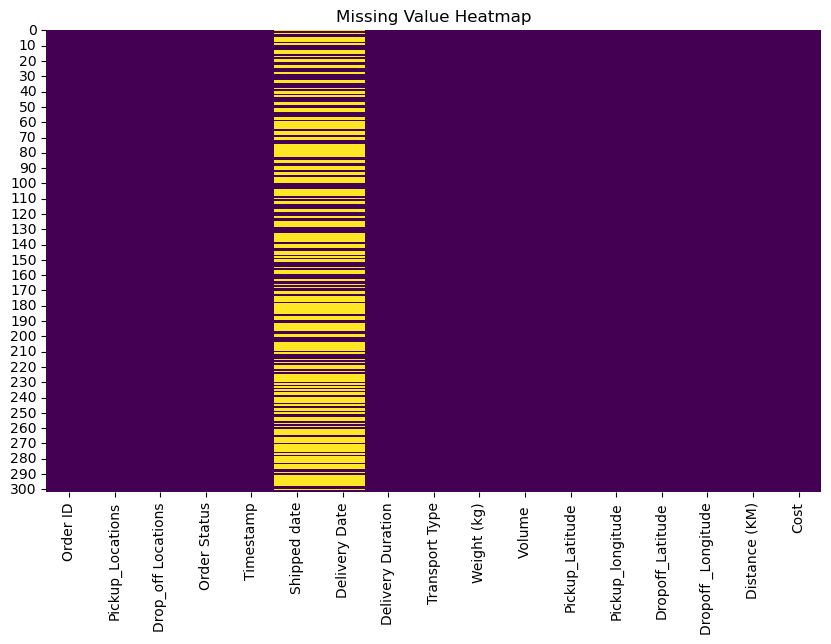

In [28]:
#visualising missing values

plt.figure(figsize=(10, 6))
sns.heatmap(TP.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Value Heatmap")
plt.show()

In [29]:
# Univariate Analysis - analysing columns such as order status, transport types etc

Delivered     120
In Transit     99
Pending        83
Name: Order Status, dtype: int64


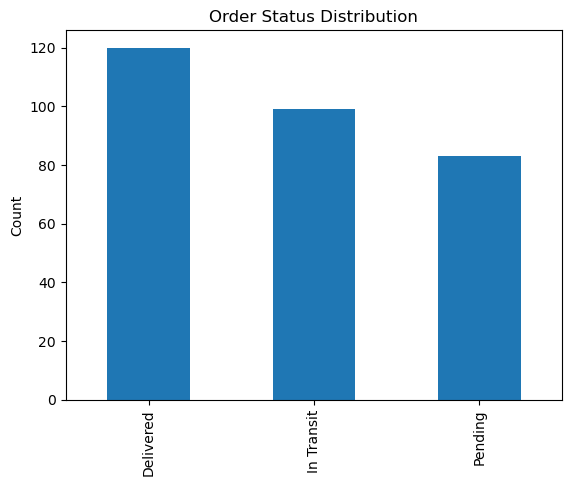

In [30]:
# Order Status Analysis
print(TP['Order Status'].value_counts())  # Count of each status

# Visualization
TP['Order Status'].value_counts().plot(kind='bar', title='Order Status Distribution')
plt.ylabel('Count')
plt.show()


Ship        216
Train        44
Truck        28
Airplane     14
Name: Transport Type, dtype: int64


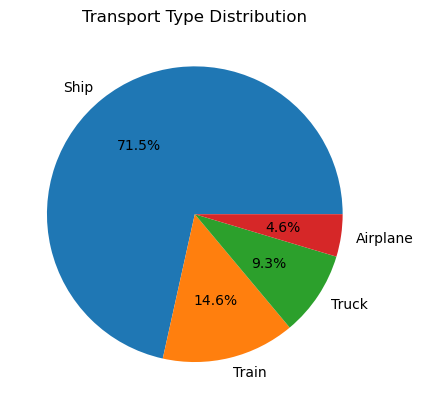

In [31]:
# Transport Type Analysis
print(TP['Transport Type'].value_counts())
TP['Transport Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Transport Type Distribution')
plt.ylabel('')
plt.show()

In [32]:
# Correlation Analysis - Examining the relationship between cost and distance 

                    Order ID  Weight (kg)   Volume   Pickup_Latitude  \
Order ID            1.000000    -0.043246  0.021855         0.020206   
Weight (kg)        -0.043246     1.000000 -0.084097        -0.002731   
Volume              0.021855    -0.084097  1.000000         0.006010   
Pickup_Latitude     0.020206    -0.002731  0.006010         1.000000   
Pickup_longitude   -0.073808     0.098178 -0.012988         0.069291   
Dropoff_Latitude   -0.028447     0.074310 -0.041341         0.075671   
Dropoff _Longitude -0.030489     0.011937  0.051011         0.023183   
Distance (KM)      -0.082577    -0.040214  0.006898         0.078209   
Cost               -0.045601    -0.282237 -0.333164         0.085488   

                    Pickup_longitude  Dropoff_Latitude  Dropoff _Longitude  \
Order ID                   -0.073808         -0.028447           -0.030489   
Weight (kg)                 0.098178          0.074310            0.011937   
Volume                     -0.012988         

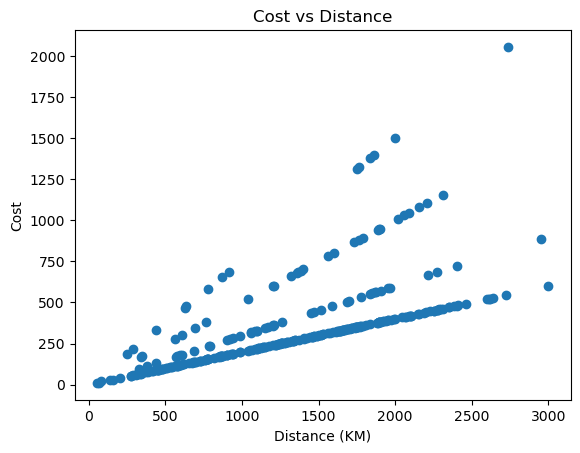

In [33]:
# Correlation Analysis
print(TP.corr())  # Correlation matrix for numeric columns

# Scatter plot: Cost vs. Distance
plt.scatter(TP['Distance (KM)'], TP['Cost'])
plt.title('Cost vs Distance')
plt.xlabel('Distance (KM)')
plt.ylabel('Cost')
plt.show()



In [34]:
print(TP.dtypes)  # Check data types of all columns
print(TP['Delivery Duration'].head())  # Inspect the 'Delivery Duration' column
print(TP['Transport Type'].head())  # Inspect the 'Transport Type' column


Order ID                int64
Pickup_Locations       object
Drop_off Locations     object
Order Status           object
Timestamp              object
Shipped date           object
Delivery Date          object
Delivery Duration      object
Transport Type         object
Weight (kg)             int64
Volume                  int64
Pickup_Latitude       float64
Pickup_longitude      float64
Dropoff_Latitude      float64
Dropoff _Longitude    float64
Distance (KM)           int64
Cost                  float64
dtype: object
0     Pending
1     9 days 
2     Pending
3     9 days 
4    12 days 
Name: Delivery Duration, dtype: object
0     Ship
1    Train
2     Ship
3    Train
4    Train
Name: Transport Type, dtype: object


In [35]:
#Coverting Delivery duration to Numeric simply to remove the days on it 
TP['Delivery Duration'] = TP['Delivery Duration'].astype(str) #first to change it to strings from object
TP['Delivery Duration'] = TP['Delivery Duration'].str.extract('(\d+)').astype(float)


In [36]:
#changing Transport type to categorical type

TP['Transport Type'] = TP['Transport Type'].astype('category')


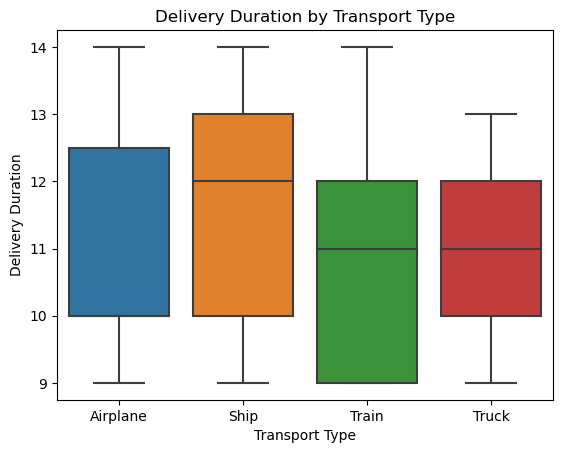

In [37]:
# Box plot: Delivery Duration by Transport Type
sns.boxplot(x='Transport Type', y='Delivery Duration', data=TP)
plt.title('Delivery Duration by Transport Type')
plt.show()


In [38]:
#Time-Based Analysis to analyse the trends over time

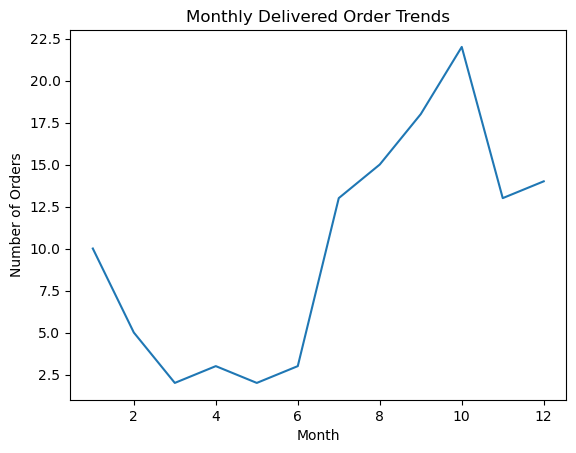

In [40]:
# Extract month and year
TP['Month'] = pd.to_datetime(TP['Delivery Date']).dt.month
TP['Year'] = pd.to_datetime(TP['Delivery Date']).dt.year

# Grouping by month and then visualize the monthly trends of orders
monthly_data = TP.groupby('Month')['Order ID'].count()
monthly_data.plot(kind='line', title='Monthly Delivered Order Trends')
plt.ylabel('Number of Orders')
plt.show()


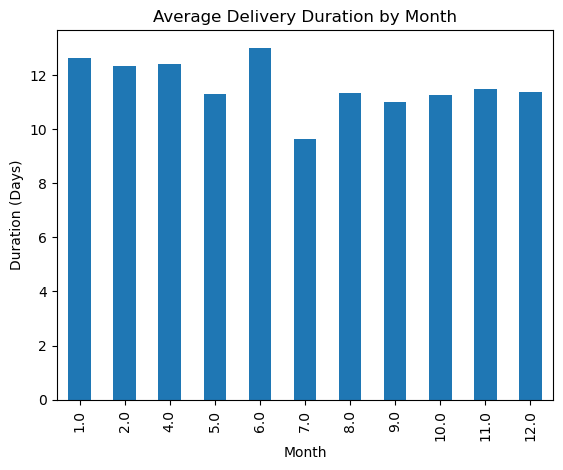

In [61]:
# Delivery Duration Trend Over Months
monthly_duration = TP.groupby('Month')['Delivery Duration'].mean()
monthly_duration.plot(kind='bar', title='Average Delivery Duration by Month')
plt.ylabel('Duration (Days)')
plt.show()

In [ ]:
#To further enhance decision making through understanding of best performing routes (Cost and Distance)

In [63]:
#Top Routes by Cost and Distance
top_routes = TP.groupby(['Pickup_Locations', 'Drop_off Locations']).agg(
    TotalCost=('Cost', 'sum'),
    TotalDistance=('Distance (KM)', 'sum'),
    OrderCount=('Order ID', 'count')
).sort_values(by='TotalCost', ascending=False)
print("Top Routes by Total Cost:\n", top_routes.head(15))


Top Routes by Total Cost:
                                      TotalCost  TotalDistance  OrderCount
Pickup_Locations Drop_off Locations                                      
New York         Sydney                8653.30          27222          16
                 Madrid                7428.93          25498          18
London           Madrid                7034.46          18919          12
Paris            Los Angeles           5558.62          18428          13
London           Rome                  5351.07          20143          12
Tokyo            Sydney                5165.08          14849          12
Berlin           Rome                  5119.16          18270          16
Tokyo            Madrid                5004.54          22391          19
Berlin           Madrid                4992.20          17144          13
New York         Singapore             4841.24          20588          16
Berlin           Los Angeles           4660.24          21261          14
           

In [72]:
#Performance of transport types

transport_performance = TP.groupby('Transport Type').agg(
    AverageCost=('Cost', 'mean'),
    AverageDistance=('Distance (KM)', 'mean'),
    Count=('Order ID', 'count')
)
print(transport_performance)


                AverageCost  AverageDistance  Count
Transport Type                                     
Airplane         897.744286      1196.928571     14
Ship             265.958519      1329.800926    216
Train            385.039091      1283.454545     44
Truck            724.323929      1448.678571     28


In [71]:
TP.head(10)

,Order ID,Pickup_Locations,Drop_off Locations,Order Status,Timestamp,Shipped date,Delivery Date,Delivery Duration,Transport Type,Weight (kg),Volume,Pickup_Latitude,Pickup_longitude,Dropoff_Latitude,Dropoff _Longitude,Distance (KM),Cost,Month,Year
0,1,Berlin,Rome,Pending,2024-12-28 21:43:23,NaN,NaN,NaN,Ship,34,32,40.85,27.51,39.83,14.32,1122,224.50,NaN,NaN
1,2,Paris,Los Angeles,Delivered,2024-12-29 21:43:25,2025-01-01 21:43:25,2025-01-14 21:43:25,13.0,Train,92,9,56.36,28.28,40.83,9.04,2217,665.04,1.0,2025.0
2,3,Tokyo,Rome,In Transit,2024-12-26 21:43:27,NaN,NaN,NaN,Ship,120,9,37.72,17.04,40.85,20.53,459,91.84,NaN,NaN
3,4,New York,Singapore,Delivered,2024-12-30 21:43:28,2025-01-01 21:43:28,2025-01-13 21:43:28,12.0,Train,92,11,54.05,27.38,35.01,0.76,2956,886.71,1.0,2025.0
4,5,London,Rome,Delivered,2024-12-28 21:43:30,2024-12-31 21:43:30,2025-10-01 21:43:30,10.0,Train,91,13,36.16,0.04,47.36,17.55,1905,571.64,10.0,2025.0
5,6,London,Sydney,In Transit,2024-12-29 21:43:31,NaN,NaN,NaN,Ship,37,19,39.58,24.87,45.08,-1.36,2230,445.93,NaN,NaN
6,7,Paris,Singapore,Pending,2024-12-28 21:43:33,NaN,NaN,NaN,Ship,111,28,51.97,-7.90,52.57,8.84,1138,227.69,NaN,NaN
7,8,Berlin,Madrid,In Transit,2024-12-30 21:43:34,NaN,NaN,NaN,Ship,117,11,44.29,20.48,52.20,-2.86,1927,385.50,NaN,NaN
8,9,Paris,Singapore,Delivered,2024-12-30 21:06:47,2025-01-01 21:06:47,2025-12-01 21:06:47,11.0,Airplane,19,6,48.43,11.26,53.54,15.38,636,477.34,12.0,2025.0
9,10,Berlin,Singapore,In Transit,2024-12-30 21:43:36,NaN,NaN,NaN,Ship,29,17,36.36,24.34,35.10,-1.30,2312,462.30,NaN,NaN


In [44]:
#saving ...
csv_filename = 'transport_data2.csv'
TP.to_csv(csv_filename, index = False)

In [45]:
print(f'Data sucessfully exported to {csv_filename}')

Data sucessfully exported to transport_data2.csv
